# AlexNet模型

## 模型的特点

1. ReLU作为激活函数
    - ReLU为非饱和函数，论文中验证其效果在较深的网络超过了SIgmoid，成功解决了SIgmoid在网络较深时的梯度弥散问题。

2. Dropout避免模型过拟合
    - 在训练时使用Dropout随机忽略一部分神经元，以避免模型过拟合。在alexnet的最后几个全连接层中使用了Dropout。

3. 重叠的最大池化
    - 之前的CNN中普遍使用平均池化，而Alexnet全部使用最大池化，避免平均池化的模糊化效果。并且，池化的步长小于核尺寸，这样使得池化层的输出之间会有重叠和覆盖，提升了特征的丰富性。

4. 提出LRN层
    - 提出LRN层，对局部神经元的活动创建竞争机制，使得响应较大的值变得相对更大，并抑制其他反馈较小的神经元，增强了模型的泛化能力。
    - 注意：LRN的效果其实是有争议的

5. 数据增强
    - 随机从256\*256的原始图像中截取224\*224大小的区域（以及水平翻转的镜像），相当于增强了（256-224）\*（256-224）\* 2=2048倍的数据量。使用了数据增强后，减轻过拟合，提升泛化能力。避免因为原始数据量的大小使得参数众多的CNN陷入过拟合中。

## 模型结构示意图

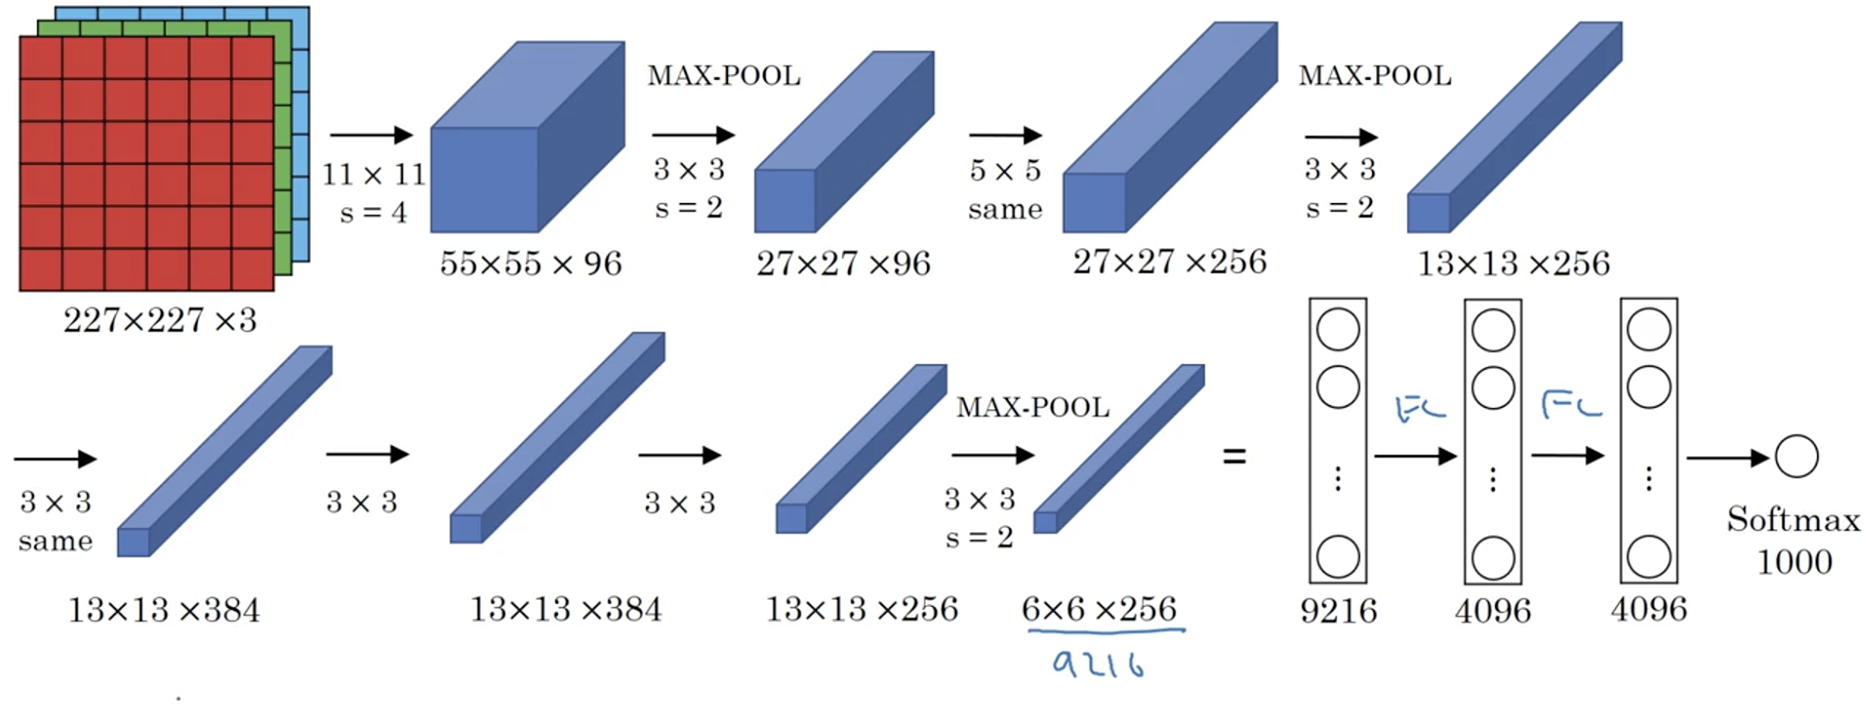

## 模型说明

- 统一说明：
    - 激活函数： ReLU 
    - 池化类型：max_pool

- 卷积输出图像大小计算公式：
    - 原凸显大小$OS$，输出图像大小$RS$，卷积核大小$KS$，步长$S$
    - $RS = \dfrac{OS-KS}{S} + 1$

1. 输入层
    - 图像大小为 227 × 227 × 3（HWC）

-----

2. 卷积层：
    - 核：
        - 大小：11 × 11，个数：96，步长：s=4。
    - 输出：
        - 55 × 55 × 96
        - 补充：$55 = \dfrac{227 - 11}{4} + 1$
3. 池化层：
    - 核：
        - 大小：3 × 3，步长：s=2，池化类型：max_pool
    - 输出：
        - 27 × 27 × 96
        
-----


4. 卷积层：
    - 核：
        - 大小：5 × 5，个数：256，步长：s=1，padding=same。
    - 输出：
        - 27 × 27 × 256
5. 池化层：
    - 核：
        - 大小：3 × 3，步长：s=2，池化类型：max_pool
    - 输出：
        - 13 × 13 × 256
-----

6. 卷积层：
    - 核：
        - 大小 3 × 3，个数 384，步长：s=1，padding=same。
    - 输出：
        - 13 × 13 × 384
-----

7. 卷积层：
    - 核：
        - 大小 3×3，个数：384，步长：s=1，padding=same。
    - 输出：
        - 13 × 13 × 384
        
-----
        
8. 卷积层：
    - 核：
        - 大小 3×3，个数：256，步长：s=1，padding=same。
    - 输出：
        - 13 × 13 × 256
9. 池化层：
    - 核：
        - 大小：3×3，步长：s=2；池化类型：max_pool
    - 输出：
        - 6 × 6 × 256

-----

- 数据格式转换
    - 6×6×256 --flatten--> 9216
        
-----

10. 全连接层：
    - 9216 ----> 4096。
11. 全连接层：
    - 4096 ---->4096。
12. 输出层：
    - 4096 ----> 1000：也是分类类别。
    - 激活函数：softmax

# 模型的实现

## PyTorch框架提供的封装

### Tensor的数据格式转换

### 容器

#### Model

- 所有神经网络的基类，可以自己子类化，创建自己的网络。这个部分主要封装神经网络的决策模型部分。

- 网络构造：
    1. 继承Model
    2. 在构造器中定义Layer，每个Layer表示一个神经网络层。
    3. overload成员函数forward，实现网络连接。
    

1. Mode的帮助文档
    - 使用python的方式：`help(Module)`
    - 使用jupyter方式：`Module?`

In [1]:
from torch.nn import Module
Module?

Init signature: Module()
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           c:\program files\python36\lib\site-packages\torch\nn\modules\module.py
Type:           type
Subclasses:     Identity, Linear, Bili

2. Model的使用例子

In [13]:
from torch.nn import Module, Identity

class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        # 定义网络层
        self.id1 = Identity()
        self.id2 = Identity()

    
    def forward(self, x):
        # 调用构造器定义的网络层，
        y = self.id1(x)
        y = self.id2(y)
        # 计算网络预测模型输出
        return y   # 返回预测模型输出，用于预测，也用于计算损失并更新权重

In [14]:
import torch

# 创建模型
model = Model()
# 准备一个数据计算
data = torch.tensor([1,2])

re = model(data)
print(re)

tensor([1, 2])


#### Sequential

- Sequential与Module的差异在于，直接把Layer串联成一个输出，等价于采用默认工作方式，缺省实现了Model中的forward。

1. Sequential的帮助文档
    - Sequential就是一个提供默认forward实现的Module的子类

In [5]:
from torch.nn import Sequential
Sequential?

Init signature: Sequential(*args)
Docstring:     
A sequential container.
Modules will be added to it in the order they are passed in the constructor.
Alternatively, an ordered dict of modules can also be passed in.

To make it easier to understand, here is a small example::

    # Example of using Sequential
    model = nn.Sequential(
              nn.Conv2d(1,20,5),
              nn.ReLU(),
              nn.Conv2d(20,64,5),
              nn.ReLU()
            )

    # Example of using Sequential with OrderedDict
    model = nn.Sequential(OrderedDict([
              ('conv1', nn.Conv2d(1,20,5)),
              ('relu1', nn.ReLU()),
              ('conv2', nn.Conv2d(20,64,5)),
              ('relu2', nn.ReLU())
            ]))
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           c:\program files\python36\lib\site-packages\torch\nn\modules\container.py
Type:           type
Subclasses:     ConvReLU2d, ConvReLU3d, LinearReLU, ConvBn2

In [10]:
# help(Sequential)

# |  Method resolution order:
# |      Sequential
# |      torch.nn.modules.module.Module
# |      builtins.object

2. Sequential的例子
    - 构造器参数支持两种：
        - 多个Layer实例参数。
        - 一个列表参数，列表由元组构成
            - 元组第一个元素：name
            - 元组第二个元素：Layer实例

In [12]:
import torch
from torch.nn import Sequential, Identity

# 构建层
id1 = Identity()    # 恒等运算
id2 = Identity()

# 构建容器
seq = Sequential(id1, id2)

# 准备一个数据计算
data = torch.tensor([1,2])

# 计算
re = seq(data)
print(re)

tensor([1, 2])


### 层-Layer

- Layer是特殊的Model容器，torch的提供的Layers都是具体的计算，包含如下计算实现。
    - Convolution layers
    - Pooling layers
    - Padding layers
    - Non-linear activations (weighted sum, nonlinearity)
    - Non-linear activations (other)
    - Normalization layers
    - Recurrent layers
    - Transformer layers
    - Linear layers
    - Dropout layers
    - Sparse layers
    - Distance functions
    - Loss functions
    - Vision layers
    - DataParallel layers (multi-GPU, distributed)

#### Layer的帮助文档

- Layer都是从Module继承用来实现独立的计算的。

In [18]:
from  torch.nn import Identity
# help(Identity)
# |  Method resolution order:
# |      Identity
# |      torch.nn.modules.module.Module
# |      builtins.object

#### Layer的使用例子

In [19]:
from  torch.nn import Identity
id1 = Identity()
id2 = Identity()

# 准备一个数据计算
data = torch.tensor([1,2])

y = id1(data)
y =id2(y)
print(y)

tensor([1, 2])


## 模型实现

In [21]:
import torch.nn as nn
# 需要安装torchsummary：pip install torchsummary
from torchsummary import summary

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        # 此处有flatten格式转换
        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


# 创建对象
net = AlexNet()
# 直接输出网络对象
print(net)
print("=========================================================")
# 输出网络结构
print(summary(net,input_size=(3, 227, 227), device='cpu'))
print("=========================================================")
# 输出网络结构
print(summary(net.cuda(),input_size=(3, 227, 227)))

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_featu

## 使用模型到ImageNet2012

### ImageNet 2012数据集说明

1. ImageNet图像数据集始于2009年
    - 当时李飞飞教授等在CVPR2009上发表了一篇名为《ImageNet: A Large-Scale Hierarchical Image Database》的论文
    - 之后就是基于ImageNet数据集的7届ImageNet挑战赛(2010年开始)
    - 2017年后，ImageNet由Kaggle公司继续维护。
        - Kaggle公司是由联合创始人兼首席执行官Anthony Goldbloom 2010年在墨尔本创立的，主要是为开发商和数据科学家提供举办机器学习竞赛、托管数据库、编写和分享代码的平台

2. WordNet是一个英语字典。
    - 由普林斯顿大学认识科学实验室在心理学教授乔治·A·米勒的指导下建立和维护的。
    - 开发工作从1985年开始。由于它包含了语义信息，所以有别于通常意义上的字典。
    - WordNet根据词条的意义将它们分组，每一个具有相同意义的字条组称为一个**synset(同义词集合)**。
    - WordNet为每一个synset提供了简短，概要的定义，并记录不同synset之间的语义关系。
    - WordNet中的每个有意义的概念(concept)(可能由多个单词或单词短语描述)被称为"同义词集(synonym set)"或"synset"。


3. ImageNet是根据WordNet层次结构组织的图像数据集。
    - 在ImageNet中，目标是为了说明每个synset，提供平均1000幅图像。 
    - 每个concept图像都是质量控制和人为标注的(quality-controlled and human-annotated)。 
    - 在完成之后（目前还没有完成），希望ImageNet能够为WordNet层次结构中的大多数concept提供数千万个干净整理的图像(cleanly sorted images)。


4. ImageNet是一项持续的研究工作，旨在为世界各地的研究人员提供易于访问的图像数据库。
    - 目前ImageNet中总共有14197122幅图像，总共分为21841个类别(synsets)，大类别包括：amphibian、animal、appliance、bird、covering、device、fabric、fish、flower、food、fruit、fungus、furniture、geological formation、invertebrate、mammal、musical instrument、plant、reptile、sport、structure、tool、tree、utensil、vegetable、vehicle、person。

### 数据集下载

1. 下载地址：
    - `http://www.image-net.org/download-imageurls`
    - 在SEARCH框中输入需要下载的synset，如tree，结果如下图所示，也可按类别下载即WordNet ID，下载链接：`http://www.image-net.org/synset?wnid=n02084071` ，其中好像个别url已失效。

2. 直接下载原始图像
    - 需要自己申请注册一个账号，然后登录，经验证普通非学校邮箱无法注册。对于希望将图像用于非商业研究或教育目的的研究人员，可以在特定条件下通过ImageNet网站提供访问权限。

3. 下载图像sift features
    - 不需要账号登录即可免费下载，包括原始sift descriptors、quantized codewords、spatial coordiates of each descriptor/codeword。
    - 提features前，需要缩放图像大小到最大边长不超过300像素。通过VLFeat开源软件提前sift features。并没有对所有的synsets图像提取sift。
    - 下载链接：`http://www.image-net.org/api/download/imagenet.sbow.synset?wnid=n02119789` ，后面的n02119789为WordNet ID,可在`http://www.image-net.org/api/text/imagenet.sbow.obtain_synset_list` 中查看有哪些WordNet ID包括sift features并可点击直接下载
    - 下载下来的是一个Matlab文件(.mat)，如`n02119789.sbow.mat`，在每个.mat文件中，每个sift descriptor有5个字段:`x, y, norm, scale, word`。
        - word字段是cluster(k-means clustering of a random subset of 10 million SIFT descriptors)中心的索引，是一个0到999之间的一个整数。


4. 下载Object Bounding Boxes
    - 不需要账号登录即可免费下载，bounding boxes是通过亚马逊土耳其机器人(Amazon Mechanical Turk)进行标注和验证的。
    - 目前标注过的synsets已经超过3000种，可从`http://www.image-net.org/api/text/imagenet.bbox.obtain_synset_list` 中查看和下载已标注的种类。
    - 对于每种synset，平均有150张带有边界框(bounding boxes)的图像。
    - 图像标注以PASCAL VOC格式保存在XML文件中，用户可以使用PASCAL Development Toolkit解析标注。
    - 注意：在边界框标注中，有两个字段(width和height)表示图像的大小。标注文件中边界框的位置和大小与此大小有关。但是，此大小可能与下载的包中的实际图像大小不同。(原因是标注文件中的大小是图像显示给标注器的显示大小)。因此，要在原始图像上找到实际像素，可能需要相应地重新缩放边界框。
    - 可以通过`http://www.image-net.org/Annotation/Annotation.tar.gz` 下载所有的标注文件，也可以通过`http://www.image-net.org/api/download/imagenet.bbox.synset?wnid=n02119789` ，下载特定的synset。
        - 后面的n02119789为WordNet ID。


5. 下载Object Attributes
    - 不需要账号登录即可免费下载，object attributes是通过亚马逊土耳其机器人(Amazon Mechanical Turk)进行标注和验证的。
    - 目前标注过的synsets大约有400种，可从`http://www.image-net.org/api/text/imagenet.attributes.obtain_synset_list` 中查看已标注的种类，通过`http://www.image-net.org/api/text/imagenet.attributes.obtain_synset_wordlist` 点击下载特定的种类。
    - 对于每一个synset，包含25种属性：
        1. 颜色：黑色，蓝色，棕色，灰色，绿色，橙色，粉红色，红色，紫罗兰色，白色，黄色; 
        2. 图案(pattern)：斑点，条纹；
        3. 形状：长，圆形，矩形，方形；
        4. 纹理(texture)：毛茸茸，光滑，粗糙，有光泽，金属色，植被(vegetation)，木质，湿润。
    - 标注的属性是基于先前收集的边界框内的object，即感兴趣区域的object而不是整幅图像。可以通过`http://www.image-net.org/downloads/attributes/attrann.ma`t 下载整个文件.
        - 这个.mat文件有一个attrann结构体，包括：
            - A. 图像列表；
            - B. bounding boxes列表：每幅图像一个，每个bounding boxes包含x1,x2,y1,y2字段，所有字段的值都归一化为介于0和1之间；
            - C. 属性列表：图像数*属性数的labels矩阵，label为1表示属性存在，label为-1表示属性不存在，label为0表示不确定。
     - 也可以通过`http://www.image-net.org/api/download/imagenet.attributes.synset?wnid=n01322604` ，下载特定的synset
         - 后面的n01322604为WordNet ID。


- ImageNet中的每张图片属于提供图片的个人，ImageNet不拥有图像的版权
    - ImageNet数据集可以免费用于学术研究和非商业用途，但不能直接使用这些数据作为产品的一部分。

- ImageNet Large Scale Visual Recognition Challenge(ILSVRC)
    - 从2010年开始,每年举办的ImageNet大规模视觉识别挑战赛，到2017年后截止。
    - 比赛项目包括：
        1. 图像分类(Classification)
        2. 目标定位(Object localization)
        3. 目标检测(Object detection)
        4. 视频目标检测(Object detection from video)
        5. 场景分类(Scene classification)
        6. 场景解析(Scene parsing)。
    - ILSVRC中使用到的数据仅是ImageNet数据集中的一部分。比赛使用的所有数据集均可通过登录后下载。

- 李飞飞教授说:
    - "ImageNet改变了AI领域人们对数据集的认识，人们真正开始意识到它在研究中的地位，就像算法一样重要"

### 加载数据集

In [20]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *
from torch.utils.data import random_split
from torch.utils.data import DataLoader

# 加载指定目录下的图像，返回根据切分比例形成的数据加载器
def load_data(img_dir, rate=0.8):
    transform = Compose(
        [
            Resize((227, 227)),          #RandomResizedCrop(227),
    #         RandomHorizontalFlip(),
            ToTensor(),
            Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
        ]
    )
    ds = ImageFolder(img_dir, transform=transform)

    l = len(ds)
    l_train = int(l * rate)
    train, test = random_split(ds, [l_train, l - l_train])
    
    train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=100)   # 100，因为每个类的图像是1300个
    test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=True, batch_size=l - l_train)  # 一个批次直接预测

    return train_loader, test_loader

### 训练

In [22]:
# from alexnet import AlexNet
# from dataset import load_data
import torch
import torch.utils.data as Data
import torchvision
import numpy as np
import struct
import cv2

# 1. 加载数据集
print("1. 加载数据集")
train_loader, test_loader = load_data("./imagenet2012", 0.8)

t_x, t_y = list(test_loader)[0]

CUDA = torch.cuda.is_available()
# 2. 网络搭建
print("2. 网络搭建")
net=AlexNet(4)
if CUDA:
    net.cuda()

# 3. 训练
print("3. 训练")
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
loss_F=torch.nn.CrossEntropyLoss()

epoch = 1


for n in range(epoch): # 数据集只迭代一次
    for step, input_data in enumerate(train_loader):
        x_, y_=input_data
        if CUDA:
            # GPU运算 -----------------------------------------------
            x_ = x_.cuda()
            y_ = y_.cuda()
        pred=net(x_.view(-1, 3, 227, 227))  
        
        loss=loss_F(pred, y_) # 计算loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            if CUDA:
                t_x = t_x.cuda()
                t_y = t_y.cuda()
            test_pred=net(t_x.view(-1, 3, 227, 227))
            prob=torch.nn.functional.softmax(test_pred, dim=1)
            pred_cls=torch.argmax(prob, dim=1)
            acc=(pred_cls == t_y).float().mean()
            print(f"轮数/批次：{n}/{step}: \t识别正确率:{acc*100:6.4f}")

# 保存模型
torch.save(net.state_dict(), "./models")  # GPU保存


1. 加载数据集
2. 网络搭建
3. 训练
轮数/批次：0/0: 	识别正确率:25.2803
轮数/批次：0/1: 	识别正确率:27.4210
轮数/批次：0/2: 	识别正确率:27.8287
轮数/批次：0/3: 	识别正确率:25.3823
轮数/批次：0/4: 	识别正确率:27.8287
轮数/批次：0/5: 	识别正确率:28.2365
轮数/批次：0/6: 	识别正确率:30.1733
轮数/批次：0/7: 	识别正确率:27.8287
轮数/批次：0/8: 	识别正确率:28.9501
轮数/批次：0/9: 	识别正确率:28.8481
轮数/批次：0/10: 	识别正确率:30.0714
轮数/批次：0/11: 	识别正确率:27.4210
轮数/批次：0/12: 	识别正确率:25.2803
轮数/批次：0/13: 	识别正确率:25.2803
轮数/批次：0/14: 	识别正确率:25.2803
轮数/批次：0/15: 	识别正确率:25.2803
轮数/批次：0/16: 	识别正确率:25.2803
轮数/批次：0/17: 	识别正确率:25.2803
轮数/批次：0/18: 	识别正确率:25.5861
轮数/批次：0/19: 	识别正确率:28.2365
轮数/批次：0/20: 	识别正确率:31.3965
轮数/批次：0/21: 	识别正确率:38.8379
轮数/批次：0/22: 	识别正确率:38.4302
轮数/批次：0/23: 	识别正确率:40.5708
轮数/批次：0/24: 	识别正确率:38.9399
轮数/批次：0/25: 	识别正确率:38.5321
轮数/批次：0/26: 	识别正确率:37.7166
轮数/批次：0/27: 	识别正确率:38.3282
轮数/批次：0/28: 	识别正确率:39.0418
轮数/批次：0/29: 	识别正确率:41.2844
轮数/批次：0/30: 	识别正确率:40.5708
轮数/批次：0/31: 	识别正确率:39.8573
轮数/批次：0/32: 	识别正确率:44.7503
轮数/批次：0/33: 	识别正确率:42.8135
轮数/批次：0/34: 	识别正确率:44.4444
轮数/批次：0/35: 	识别正确率:44.5464
轮数/批次：0/36: 	识别

## 使用模型到MNIST

### 使用原模型

1. 加载数据集

In [1]:
import torch
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import struct
import cv2
# 读取图片
def load_image_fromfile(filename):
    with open(filename, 'br') as fd:
        # 读取图像的信息
        header_buf = fd.read(16)   # 16字节，4个int整数
        # 按照字节解析头信息（具体参考python SL的struct帮助）
        magic_, nums_, width_, height_ = struct.unpack('>iiii', header_buf)  # 解析成四个整数：>表示大端字节序，i表示4字节整数
        # 保存成ndarray对象
        imgs_ = np.fromfile(fd, dtype=np.uint8)
        imgs_ = imgs_.reshape(nums_, height_, width_)
        
        # 为了使用AlexNet，输入图像调整为227 × 227
    
    imgs2_ = np.ndarray(shape=(imgs_.shape[0], 227, 227), dtype=imgs_.dtype)
    for idx in  range(imgs_.shape[0]):
        imgs2_[idx] =  cv2.resize(imgs_[idx], (227, 227))
    return imgs2_

# 读取标签
def load_label_fromfile(filename):
    with open(filename, 'br') as fd:
        header_buf = fd.read(8) 
        magic, nums = struct.unpack('>ii' ,header_buf) 
        labels_ = np.fromfile(fd, np.uint8) 
    return labels_

# 读取训练集
train_x = load_image_fromfile("datasets/train-images.idx3-ubyte")
train_y = load_label_fromfile("datasets/train-labels.idx1-ubyte")
train_x = train_x[0:10000]
train_y = train_y[0:10000]
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.int64)
# 读取测试集
test_x = load_image_fromfile("datasets/t10k-images.idx3-ubyte")
test_y = load_label_fromfile("datasets/t10k-labels.idx1-ubyte")
test_x = test_x[0:2000]
test_y = test_y[0:2000]

x = torch.Tensor(train_x).view(train_x.shape[0], train_x.shape[1], train_x.shape[2])   
y = torch.LongTensor(train_y)

t_x =  torch.Tensor(test_x).view(test_x.shape[0], test_x.shape[1], test_x.shape[2])  
t_y =  torch.LongTensor(test_y)

# 使用TensorDataSet封装数据与标签
train_dataset = torch.utils.data.TensorDataset(x, y)
test_dataset = torch.utils.data.TensorDataset(t_x, t_y)

# 数据随机与切分器
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=500)   # 批次数量1000
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=True, batch_size=2000)  # 一个批次直接预测
x.shape, y.shape

(torch.Size([10000, 227, 227]), torch.Size([10000]))

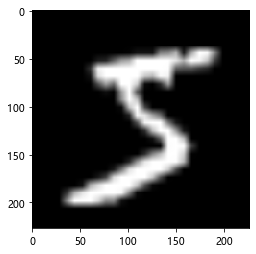

In [2]:
%matplotlib  inline
import matplotlib.pyplot as plt
plt.imshow(x[0],cmap='gray')
plt.show()

2. 模型实现
    - 下面AlexNet没有使用原模型中的LRN（局部响应归一化）：nn.LocalResponseNorm

In [3]:
import torch.nn as nn


class AlexNet_MNIST(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet_MNIST, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),    # 输入通道是1
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        # 此处有flatten格式转换
        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),    # 分类只有10类
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

3. 模型训练

In [ ]:
# 2. 网络搭建
net=AlexNet_MNIST(10)
# 3. 训练
# 3. 网络的训练（和之前CNN训练的代码基本一样）
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
loss_F=torch.nn.CrossEntropyLoss()

epoch = 100

for n in range(epoch): # 数据集只迭代一次
    for step, input_data in enumerate(train_loader):
        x_, y_=input_data
        pred=net(x_.view(-1, 1, 227, 227))  
        
        loss=loss_F(pred, y_) # 计算loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            test_pred=net(t_x.view(-1, 1, 227, 227))
            prob=torch.nn.functional.softmax(test_pred, dim=1)
            pred_cls=torch.argmax(prob, dim=1)
            acc=(pred_cls == t_y).float().mean()
            print(f"轮数/批次：{n}/{step}: \t识别正确率:{acc*100:6.4f}")

轮数/批次：0/0: 	识别正确率:11.0500
轮数/批次：0/1: 	识别正确率:10.0500
轮数/批次：0/2: 	识别正确率:9.4500
轮数/批次：0/3: 	识别正确率:9.7000
轮数/批次：0/4: 	识别正确率:9.0500
轮数/批次：0/5: 	识别正确率:13.0500
轮数/批次：0/6: 	识别正确率:11.5000
轮数/批次：0/7: 	识别正确率:11.6500
轮数/批次：0/8: 	识别正确率:25.1000
轮数/批次：0/9: 	识别正确率:26.8000
轮数/批次：0/10: 	识别正确率:24.7500
轮数/批次：0/11: 	识别正确率:27.0000
轮数/批次：0/12: 	识别正确率:34.8000
轮数/批次：0/13: 	识别正确率:25.1000
轮数/批次：0/14: 	识别正确率:21.3000
轮数/批次：0/15: 	识别正确率:20.9500
轮数/批次：0/16: 	识别正确率:25.4500
轮数/批次：0/17: 	识别正确率:26.0000
轮数/批次：0/18: 	识别正确率:30.7500
轮数/批次：0/19: 	识别正确率:32.7500
轮数/批次：1/0: 	识别正确率:32.0000
轮数/批次：1/1: 	识别正确率:30.7000
轮数/批次：1/2: 	识别正确率:31.2500
轮数/批次：1/3: 	识别正确率:33.5500
轮数/批次：1/4: 	识别正确率:39.0500
轮数/批次：1/5: 	识别正确率:48.0500
轮数/批次：1/6: 	识别正确率:47.8000
轮数/批次：1/7: 	识别正确率:55.5500
轮数/批次：1/8: 	识别正确率:58.1000
轮数/批次：1/9: 	识别正确率:61.1500
轮数/批次：1/10: 	识别正确率:64.9000
轮数/批次：1/11: 	识别正确率:71.8500
轮数/批次：1/12: 	识别正确率:65.6500
轮数/批次：1/13: 	识别正确率:73.5000
轮数/批次：1/14: 	识别正确率:75.8500
轮数/批次：1/15: 	识别正确率:77.4500
轮数/批次：1/16: 	识别正确率:80.9500
轮数/批次：1/17: 	识别正确率:80.85

-----